Import python libraries required for the script

In [1]:
# Performance metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

#Classifier imports
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Initialize our classifiers
ADA = AdaBoostClassifier(n_estimators=100, random_state=7)
BNB = BernoulliNB()
GNB = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
LSVC = LinearSVC(max_iter=3000, tol=0.001, random_state=7)
MNB = MultinomialNB()
NSVC = NuSVC(nu=0.5, gamma='scale', random_state=7) # need to study about good value for nu
SVC = SVC(gamma='scale', random_state=7)

BAG = BaggingClassifier(n_estimators=100, n_jobs=-1, random_state=7) #   needs increase in n_estimators --> warm_start=True,
GBC = GradientBoostingClassifier(n_estimators=100, warm_start=True, random_state=7)
LR = LogisticRegression(solver='lbfgs', multi_class='multinomial', warm_start=True, n_jobs=-1)
MLP1 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(24, 12, 6, 3), random_state=7, warm_start=True)
MLP2 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(12, 6, 3), random_state=7, warm_start=True)
RFC = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=7) # needs increase in n_estimators --> warm_start=True,
SGD = SGDClassifier(max_iter=1000, tol=0.001, n_jobs=-1, warm_start=True, random_state=7)
XTree = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=7) # needs increase in n_estimators --> warm_start=True,

# Vote = VotingClassifier()


Read the CSV files

In [3]:
df = pd.read_csv('VMI_Data_BP1_V02_AK6_mod02.csv')
print(df.columns)

Index(['CUT_LENGTH', 'CONV_WAIT_TIME', 'LFT_SPLICE_LENGTH',
       'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 'SPLICE_OK', 'BP1_S8_L',
       'BP1_S7_L', 'BP1_S6_L', 'BP1_S5_L', 'BP1_S4_L', 'BP1_S3_L', 'BP1_S2_L',
       'BP1_S1_ML', 'BP1_S1_MR', 'BP1_S2_R', 'BP1_S3_R', 'BP1_S4_R',
       'BP1_S5_R', 'BP1_S6_R', 'BP1_S7_R', 'BP1_S8_R', 'PART_LENGTH',
       'LFT_SPLICE_DELTA', 'LFT_SPLICE_PREV', 'LFT_SPLICE_MA5',
       'LFT_SPLICE_MA10', 'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50',
       'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10', 'LFT_SPLICE_SLOPE20',
       'LFT_SPLICE_SLOPE50', 'MID_SPLICE_DELTA', 'MID_SPLICE_PREV',
       'MID_SPLICE_MA5', 'MID_SPLICE_MA10', 'MID_SPLICE_MA20',
       'MID_SPLICE_MA50', 'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10',
       'MID_SPLICE_SLOPE20', 'MID_SPLICE_SLOPE50', 'RHT_SPLICE_DELTA',
       'RHT_SPLICE_PREV', 'RHT_SPLICE_MA5', 'RHT_SPLICE_MA10',
       'RHT_SPLICE_MA20', 'RHT_SPLICE_MA50', 'RHT_SPLICE_SLOPE5',
       'RHT_SPLICE_SLOPE10', 'RHT_SPLICE_SLOPE20

In [4]:
df = df.drop(['LFT_SPLICE_LENGTH', 'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 'SPLICE_OK', 
              'LFT_SPLICE_GRADE', 'MID_SPLICE_GRADE', 'RHT_SPLICE_GRADE', 'LFT_SPLICE_DELTA', 
              'LFT_SPLICE_MA5', 'LFT_SPLICE_MA10', 'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50', 
              'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10', 'LFT_SPLICE_SLOPE20', 'LFT_SPLICE_SLOPE50',
              'MID_SPLICE_DELTA', 'MID_SPLICE_MA5', 'MID_SPLICE_MA10', 'MID_SPLICE_MA20',
              'MID_SPLICE_MA50', 'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10', 'MID_SPLICE_SLOPE20',
              'MID_SPLICE_SLOPE50', 'RHT_SPLICE_DELTA',  'RHT_SPLICE_MA5', 'RHT_SPLICE_MA10', 
              'RHT_SPLICE_MA20', 'RHT_SPLICE_MA50', 'RHT_SPLICE_SLOPE5', 'RHT_SPLICE_SLOPE10',
              'RHT_SPLICE_SLOPE20', 'RHT_SPLICE_SLOPE50'], axis=1)

print(df.columns)

Index(['CUT_LENGTH', 'CONV_WAIT_TIME', 'BP1_S8_L', 'BP1_S7_L', 'BP1_S6_L',
       'BP1_S5_L', 'BP1_S4_L', 'BP1_S3_L', 'BP1_S2_L', 'BP1_S1_ML',
       'BP1_S1_MR', 'BP1_S2_R', 'BP1_S3_R', 'BP1_S4_R', 'BP1_S5_R', 'BP1_S6_R',
       'BP1_S7_R', 'BP1_S8_R', 'PART_LENGTH', 'LFT_SPLICE_PREV',
       'MID_SPLICE_PREV', 'RHT_SPLICE_PREV', 'SPLICE_GRADE'],
      dtype='object')


In [5]:
print(df.shape)
# df = df.drop_duplicates(subset=['CUT_LENGTH', 'CONV_WAIT_TIME', 'PA_S8_L', 'PA_S7_L', 'PA_S6_L', 'PA_S5_L', 
#                                 'PA_S4_L', 'PA_S3_L', 'PA_S2_L', 'PA_S1_ML', 'PA_S1_MR', 'PA_S2_R', 
#                                 'PA_S3_R', 'PA_S4_R', 'PA_S5_R', 'PA_S6_R', 'PA_S7_R', 'PA_S8_R'])
df = df.drop_duplicates()

print(df.shape)

(118219, 23)
(118219, 23)


Check the columns in the data

In [6]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(10))
df = df.dropna()

                Total  Percent
SPLICE_GRADE        0      0.0
BP1_S1_MR           0      0.0
CONV_WAIT_TIME      0      0.0
BP1_S8_L            0      0.0
BP1_S7_L            0      0.0
BP1_S6_L            0      0.0
BP1_S5_L            0      0.0
BP1_S4_L            0      0.0
BP1_S3_L            0      0.0
BP1_S2_L            0      0.0


In [7]:
def numericSG(row):
    if row['SPLICE_GRADE'] == 'Bad':
        return 0
    if row['SPLICE_GRADE'] == 'OK' :
        return 1
    return 2

In [8]:
# df = df.groupby('SPLICE_GRADE', group_keys=False).apply(lambda x: x.sample(120))
df['SPLICE_GRADE'] = df.apply(numericSG, axis=1) 

# df.to_csv('temp.csv', header=True, index=False)

In [9]:
X = df.drop(['SPLICE_GRADE'], axis=1)
y = df['SPLICE_GRADE']
y = y.astype('int')

fold = 1
kf = KFold(n_splits=5, random_state=None, shuffle=True)
for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x1, x2 = X.iloc[train_index], X.iloc[test_index]
    y1, y2 = y.iloc[train_index], y.iloc[test_index]
    
    print(" ********** FOLD - ", fold, " ********** ")
    # Train our classifier and test predict
    BNB.fit(x1,y1)
    y2_BNB_model = BNB.predict(x2)
    print("BernoulliNB Accuracy :", accuracy_score(y2, y2_BNB_model))

    GNB.fit(x1, y1)
    y2_GNB_model = GNB.predict(x2)
    print("GaussianNB Accuracy :", accuracy_score(y2, y2_GNB_model))

    KNN.fit(x1,y1)
    y2_KNN_model = KNN.predict(x2)
    print("KNeighborsClassifier Accuracy :", accuracy_score(y2, y2_KNN_model))

    LR.fit(x1,y1)
    y2_LR_model = LR.predict(x2)
    print("LogisticRegression Accuracy :", accuracy_score(y2, y2_LR_model))

    LSVC.fit(x1,y1)
    y2_LSVC_model = LSVC.predict(x2)
    print("LinearSVC Accuracy :", accuracy_score(y2, y2_LSVC_model))

    MLP1.fit(x1,y1)
    y2_MLP1_model = MLP1.predict(x2)
    print("MLPClassifier 1 Accuracy :", accuracy_score(y2, y2_MLP1_model))
    
    MLP2.fit(x1,y1)
    y2_MLP2_model = MLP2.predict(x2)
    print("MLPClassifier 2 Accuracy :", accuracy_score(y2, y2_MLP2_model))
    
#     MNB.fit(x1,y1)
#     y2_MNB_model = MNB.predict(x2)
#     print("MultinomialNB Accuracy :", accuracy_score(y2, y2_MNB_model))
    
#     NSVC.fit(x1,y1)
#     y2_NSVC_model = NSVC.predict(x2)
#     print("NuSVC Accuracy :", accuracy_score(y2, y2_NSVC_model))
    
    SGD.fit(x1,y1)
    y2_SGD_model = SGD.predict(x2)
    print("SGDClassifier Accuracy :", accuracy_score(y2, y2_SGD_model))
    
    SVC.fit(x1,y1)
    y2_SVC_model = SVC.predict(x2)
    print("SVC Accuracy :", accuracy_score(y2, y2_SVC_model))
    
    ADA.fit(x1,y1)
    y2_ADA_model = ADA.predict(x2)
    print("AdaBoostClassifier Accuracy :", accuracy_score(y2, y2_ADA_model))
    
    BAG.fit(x1,y1)
    y2_BAG_model = BAG.predict(x2)
    print("BaggingClassifier Accuracy :", accuracy_score(y2, y2_BAG_model))

    XTree.fit(x1,y1)
    y2_XTree_model = XTree.predict(x2)
    print("ExtraTreesClassifier Accuracy :", accuracy_score(y2, y2_XTree_model))

    GBC.fit(x1,y1)
    y2_GBC_model = GBC.predict(x2)
    print("GradientBoostingClassifier Accuracy :", accuracy_score(y2, y2_GBC_model))

    RFC.fit(x1,y1)
    y2_RFC_model = RFC.predict(x2)
    print("RandomForestClassifier Accuracy :", accuracy_score(y2, y2_RFC_model))
    
    fold += 1


 ********** FOLD -  1  ********** 
BernoulliNB Accuracy : 0.7900947386229065
GaussianNB Accuracy : 0.6716714599898495
KNeighborsClassifier Accuracy : 0.8042209440027068
LogisticRegression Accuracy : 0.799568600913551


C:\Users\SajidPatel\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC Accuracy : 0.795973608526476
MLPClassifier 1 Accuracy : 0.795043139908645
MLPClassifier 2 Accuracy : 0.795043139908645
SGDClassifier Accuracy : 0.7966080189477246
SVC Accuracy : 0.795043139908645
AdaBoostClassifier Accuracy : 0.8045592962273727
BaggingClassifier Accuracy : 0.8209693791236677
ExtraTreesClassifier Accuracy : 0.8219844357976653
GradientBoostingClassifier Accuracy : 0.8220690238538318
RandomForestClassifier Accuracy : 0.8242260192860769
 ********** FOLD -  2  ********** 
BernoulliNB Accuracy : 0.7904330908475723
GaussianNB Accuracy : 0.6434613432583319
KNeighborsClassifier Accuracy : 0.8048130603958721
LogisticRegression Accuracy : 0.799187954660802


C:\Users\SajidPatel\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC Accuracy : 0.28167822703434275
MLPClassifier 1 Accuracy : 0.7952969040771443
MLPClassifier 2 Accuracy : 0.7952969040771443
SGDClassifier Accuracy : 0.7963965488073084
SVC Accuracy : 0.7952969040771443
AdaBoostClassifier Accuracy : 0.8063356454068685
BaggingClassifier Accuracy : 0.8231263745559128
ExtraTreesClassifier Accuracy : 0.8232955506682457
GradientBoostingClassifier Accuracy : 0.82714430722382
RandomForestClassifier Accuracy : 0.8289629504313991
 ********** FOLD -  3  ********** 
BernoulliNB Accuracy : 0.7858230417864998
GaussianNB Accuracy : 0.6195652173913043
KNeighborsClassifier Accuracy : 0.8022331246827948
LogisticRegression Accuracy : 0.796311960751142


C:\Users\SajidPatel\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC Accuracy : 0.7923363221113179
MLPClassifier 1 Accuracy : 0.79144814752157
MLPClassifier 2 Accuracy : 0.79144814752157
SGDClassifier Accuracy : 0.7964388428353917
SVC Accuracy : 0.79144814752157
AdaBoostClassifier Accuracy : 0.8040940619184571
BaggingClassifier Accuracy : 0.8186009135510066
ExtraTreesClassifier Accuracy : 0.8194045000845881
GradientBoostingClassifier Accuracy : 0.82283031635933
RandomForestClassifier Accuracy : 0.8246066655388259
 ********** FOLD -  4  ********** 
BernoulliNB Accuracy : 0.787303332769413
GaussianNB Accuracy : 0.6533581458298088
KNeighborsClassifier Accuracy : 0.8065471155472848
LogisticRegression Accuracy : 0.7985958382676366


C:\Users\SajidPatel\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC Accuracy : 0.7938589071223143
MLPClassifier 1 Accuracy : 0.7932667907291491
MLPClassifier 2 Accuracy : 0.7932667907291491
SGDClassifier Accuracy : 0.7942818474031467
SVC Accuracy : 0.7932667907291491
AdaBoostClassifier Accuracy : 0.8038402977499577
BaggingClassifier Accuracy : 0.8200389105058365
ExtraTreesClassifier Accuracy : 0.8206733209270851
GradientBoostingClassifier Accuracy : 0.827313483336153
RandomForestClassifier Accuracy : 0.8260869565217391
 ********** FOLD -  5  ********** 
BernoulliNB Accuracy : 0.7895783107050712
GaussianNB Accuracy : 0.7287569259400245
KNeighborsClassifier Accuracy : 0.8046356215370299
LogisticRegression Accuracy : 0.8001522649409973


C:\Users\SajidPatel\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC Accuracy : 0.7963879372330076
MLPClassifier 1 Accuracy : 0.7953728376263588
MLPClassifier 2 Accuracy : 0.7953728376263588
SGDClassifier Accuracy : 0.7970646703041069
SVC Accuracy : 0.7953728376263588
AdaBoostClassifier Accuracy : 0.8036628177473248
BaggingClassifier Accuracy : 0.8199467072706509
ExtraTreesClassifier Accuracy : 0.8199467072706509
GradientBoostingClassifier Accuracy : 0.8254874592902762
RandomForestClassifier Accuracy : 0.8232457809922599


In [10]:
target_names = ['Bad', 'OK', 'Good']
class_names = target_names

In [11]:
print(" *********** BernoulliNB *********** ")
print(classification_report(y2, y2_BNB_model, target_names=target_names, sample_weight=None, digits=4))

print(" *********** GaussianNB *********** ")
print(classification_report(y2, y2_GNB_model, target_names=target_names, sample_weight=None, digits=4))

print(" *********** KNeighborsClassifier *********** ")
print(classification_report(y2, y2_KNN_model, target_names=target_names, sample_weight=None, digits=4))

print(" *********** LogisticRegression *********** ")
print(classification_report(y2, y2_LR_model, target_names=target_names, sample_weight=None, digits=4))

print(" *********** LinearSVC *********** ")
print(classification_report(y2, y2_LSVC_model, target_names=target_names, sample_weight=None, digits=4))

print(" *********** MLPClassifier 1 *********** ")
print(classification_report(y2, y2_MLP1_model, target_names=target_names, sample_weight=None, digits=4))

print(" *********** MLPClassifier 2 *********** ")
print(classification_report(y2, y2_MLP2_model, target_names=target_names, sample_weight=None, digits=4))

print(" *********** SGDClassifier *********** ")
print(classification_report(y2, y2_SGD_model, target_names=target_names, sample_weight=None, digits=4))

print(" *********** SVC *********** ")
print(classification_report(y2, y2_SVC_model, target_names=target_names, sample_weight=None, digits=4))

print(" *********** AdaBoostClassifier *********** ")
print(classification_report(y2, y2_ADA_model, target_names=target_names, sample_weight=None, digits=4))
    
print(" *********** BaggingClassifier *********** ")
print(classification_report(y2, y2_BAG_model, target_names=target_names, sample_weight=None, digits=4))

print(" *********** ExtraTreesClassifier *********** ")
print(classification_report(y2, y2_XTree_model, target_names=target_names, sample_weight=None, digits=4))

print(" *********** GradientBoostingClassifier *********** ")
print(classification_report(y2, y2_GBC_model, target_names=target_names, sample_weight=None, digits=4))

print(" *********** RandomForestClassifier *********** ")
print(classification_report(y2, y2_RFC_model, target_names=target_names, sample_weight=None, digits=4))


 *********** BernoulliNB *********** 
              precision    recall  f1-score   support

         Bad     0.3571    0.0035    0.0069      4307
          OK     0.7960    0.9906    0.8827     18805
        Good     0.1212    0.0452    0.0658       531

   micro avg     0.7896    0.7896    0.7896     23643
   macro avg     0.4248    0.3464    0.3185     23643
weighted avg     0.7009    0.7896    0.7048     23643

 *********** GaussianNB *********** 
              precision    recall  f1-score   support

         Bad     0.3762    0.2440    0.2960      4307
          OK     0.8240    0.8497    0.8367     18805
        Good     0.1372    0.3766    0.2011       531

   micro avg     0.7288    0.7288    0.7288     23643
   macro avg     0.4458    0.4901    0.4446     23643
weighted avg     0.7270    0.7288    0.7239     23643

 *********** KNeighborsClassifier *********** 
              precision    recall  f1-score   support

         Bad     0.5445    0.3109    0.3958      4307
       

C:\Users\SajidPatel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



 *********** SVC *********** 
              precision    recall  f1-score   support

         Bad     0.0000    0.0000    0.0000      4307
          OK     0.7954    1.0000    0.8860     18805
        Good     0.0000    0.0000    0.0000       531

   micro avg     0.7954    0.7954    0.7954     23643
   macro avg     0.2651    0.3333    0.2953     23643
weighted avg     0.6326    0.7954    0.7047     23643

 *********** AdaBoostClassifier *********** 
              precision    recall  f1-score   support

         Bad     0.5650    0.2714    0.3667      4307
          OK     0.8325    0.9464    0.8858     18805
        Good     0.1795    0.0659    0.0964       531

   micro avg     0.8037    0.8037    0.8037     23643
   macro avg     0.5256    0.4279    0.4496     23643
weighted avg     0.7691    0.8037    0.7735     23643

 *********** BaggingClassifier *********** 
              precision    recall  f1-score   support

         Bad     0.6150    0.3569    0.4517      4307
         

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 1537  2768     2]
 [  944 17833    28]
 [   18   497    16]]
Normalized confusion matrix
[[3.57e-01 6.43e-01 4.64e-04]
 [5.02e-02 9.48e-01 1.49e-03]
 [3.39e-02 9.36e-01 3.01e-02]]


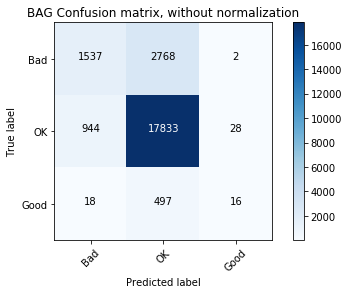

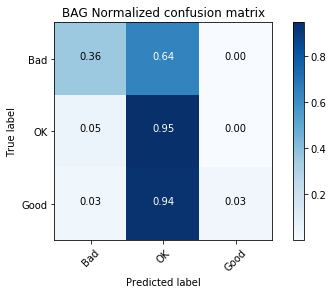

In [13]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y2, y2_BAG_model)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='BAG Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='BAG Normalized confusion matrix')

plt.show();

Confusion matrix, without normalization
[[ 1334  2971     2]
 [  741 18029    35]
 [    9   499    23]]
Normalized confusion matrix
[[3.10e-01 6.90e-01 4.64e-04]
 [3.94e-02 9.59e-01 1.86e-03]
 [1.69e-02 9.40e-01 4.33e-02]]


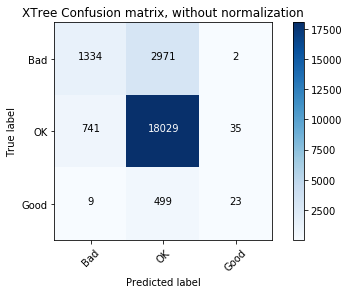

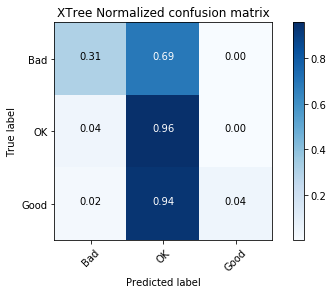

In [14]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y2, y2_XTree_model)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='XTree Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='XTree Normalized confusion matrix')

plt.show();

Confusion matrix, without normalization
[[ 1466  2840     1]
 [  803 17983    19]
 [   11   505    15]]
Normalized confusion matrix
[[3.40e-01 6.59e-01 2.32e-04]
 [4.27e-02 9.56e-01 1.01e-03]
 [2.07e-02 9.51e-01 2.82e-02]]


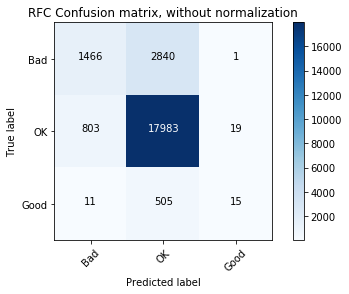

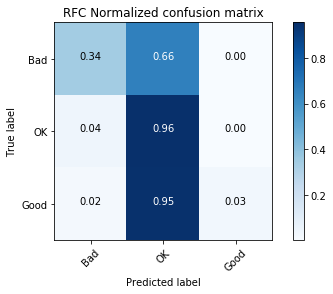

In [15]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y2, y2_RFC_model)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='RFC Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='RFC Normalized confusion matrix')

plt.show();

In [16]:
# Try out these
# sklearn.multioutput.MultiOutputClassifier
# sklearn.multiclass.OutputCodeClassifier
# sklearn.multiclass.OneVsOneClassifier
# sklearn.multiclass.OneVsRestClassifier
# sklearn.model_selection.RandomizedSearchCV -- https://stackoverflow.com/questions/52029408/sklearn-mlp-classifier-hyperparameter-optimization-randomizedsearchcv
# sklearn.model_selection.check_cv
# sklearn.model_selection.StratifiedKFold
# sklearn.linear_model.RidgeClassifierCV
# sklearn.linear_model.PassiveAggressiveClassifier
# sklearn.linear_model.LogisticRegressionCV
# sklearn.gaussian_process.GaussianProcessClassifier
# sklearn.tree.DecisionTreeClassifier
# sklearn.tree.ExtraTreeClassifier
# Feature significance
# Narrow to Wide Splice
# Prev Deltas MA & Slope
